In [1]:
import numpy as np
import kwant
import matplotlib.pyplot as pyplot
from functools import lru_cache

In [2]:
syst = kwant.Builder()

In [3]:
a = 1
lat = kwant.lattice.square(a)

In [4]:
t = 1.0
W = 10
L = 30

for i in range(L):
    for j in range(W):
        syst[lat(i,j)] = 4 * t
        
        if j > 0:
            syst[lat(i,j), lat(i,j-1)] = -t
            
        if i > 0:
            syst[lat(i,j), lat(i-1,j)] = -t

In [5]:
sym_left_lead = kwant.TranslationalSymmetry((-a,0))
left_lead = kwant.Builder(sym_left_lead)

In [6]:
for j in range(W):
    left_lead[lat(0, j)] = 4 * t
    if j > 0:
        left_lead[lat(0, j), lat(0,j - 1)] = -t
    left_lead[lat(1, j), lat(0, j)] = -t

In [7]:
syst.attach_lead(left_lead)

[]

In [8]:
sym_right_lead = kwant.TranslationalSymmetry((a,0))
right_lead = kwant.Builder(sym_right_lead)

In [9]:
for j in range(W):
    right_lead[lat(0,j)] = 4 * t
    if j > 0:
        right_lead[lat(0, j), lat(0, j - 1)] = -t
    right_lead[lat(1, j), lat(0, j)] = -t
    
syst.attach_lead(right_lead)

[]

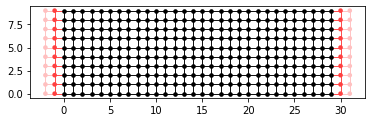

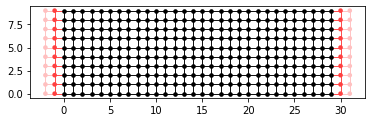

In [10]:
kwant.plot(syst)

In [11]:
syst = syst.finalized()

In [12]:
energies = []
data = []
for ie in range(100):
    energy = ie * 0.01
    smatrix = kwant.smatrix(syst, energy)
    energies.append(energy)
    data.append(smatrix.transmission(1,0))

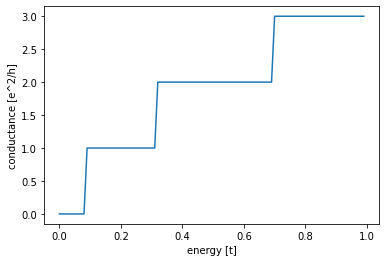

In [13]:
pyplot.figure()
pyplot.plot(energies, data)
pyplot.xlabel("energy [t]")
pyplot.ylabel("conductance [e^2/h]")
pyplot.show()

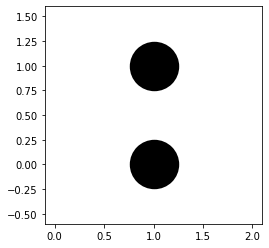

In [14]:
a=1
lat = kwant.lattice.square(a, norbs=1)
syst = kwant.Builder()

syst[lat(1, 0)] = 4
syst[lat(1, 1)] = 4

kwant.plot(syst);

In [15]:
from kwant.continuum import discretize

In [16]:
template = kwant.continuum.discretize('k_x * A(x) * k_x')
print(template)

# Discrete coordinates: x

# Onsite element:
def onsite(site, A):
    (x, ) = 1 * site.tag
    _const_0 = (  # Not supported in Python:
  # A
A(-1/2 + x))
    _const_1 = (  # Not supported in Python:
  # A
A(1/2 + x))
    return (_const_0 + _const_1)

# Hopping from (1,):
def hopping_1(site1, site2, A):
    (x, ) = 1 * site1.tag
    _const_0 = (  # Not supported in Python:
  # A
A(1/2 + x))
    return (-_const_0)


In [17]:
np.kron([1,10,100], [5,6,7])

array([  5,   6,   7,  50,  60,  70, 500, 600, 700])